In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
train= pd.read_csv('Project_1_Mercedes-Benz_Greener_Manufacturing/train.csv')
test = pd.read_csv('Project_1_Mercedes-Benz_Greener_Manufacturing/test.csv')

In [81]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [82]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [83]:
train.drop(['ID'],axis=1,inplace=True)
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test.drop(['ID'],axis=1,inplace=True)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [85]:
ser = pd.Series((train[list(train.columns)[8:]].var()==0))
zero_var_cols = []
non_zero_var_cols = []
for i in range(10,500):
    if list(ser.index).count("X"+str(i))>0:
        if ser["X"+str(i)]==True:
            zero_var_cols.append("X"+str(i))
        else:
            non_zero_var_cols.append("X"+str(i))

/var/folders/h8/4hprg5r52wqcczhnkxwnfgt00000gn/T/ipykernel_23787/2285104892.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ser = pd.Series((train[list(train.columns)[8:]].var()==0))


In [86]:
train.drop(zero_var_cols,inplace=True,axis=1)
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
test.drop(zero_var_cols,inplace=True,axis=1)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
sum(train.isna().any())

0

In [89]:
sum(test.isna().any())

0

In [90]:
np.unique(train.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [91]:
categorical_cols = ["X0","X1","X2","X3","X4","X5","X6","X8"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    le_fit =  le.fit(np.union1d(np.unique(train[col]),np.unique(test[col])))
    train[col]=le.transform(train[col])
    test[col]=le.transform(test[col])

In [92]:
y_train = train[['y']]

In [93]:
train.drop('y',axis=1,inplace=True)
train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,24,21,38,5,3,30,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
col_names = list(train.iloc[:,:].columns) # [0,1,2,3,4,5,6,7]

In [96]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
train = normalize(train)
test = normalize(test)
train = standardScaler.fit_transform(train)
test = standardScaler.transform(test)

In [97]:
train = pd.DataFrame(train,columns=col_names)
test = pd.DataFrame(test,columns=col_names)

In [98]:
train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,-0.024634,0.946535,-0.249581,-1.469596,-0.590029,0.965096,0.243500,0.062037,-0.114959,-0.274792,...,-0.656706,-0.240022,1.087097,-0.143977,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
1,-0.137802,0.674721,-0.154896,0.141177,-0.716450,1.238423,0.633395,-0.003078,-0.114959,-0.274792,...,1.046700,-0.240022,-0.640540,-0.143977,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
2,-1.218495,0.802914,0.930978,-0.718179,-0.921356,0.953092,0.009931,0.835999,-0.114959,-0.274792,...,-0.656706,-0.240022,-0.640540,-0.143977,-0.096345,-0.087548,8.214148,-0.039803,-0.021758,-0.037757
3,-1.085984,0.689465,1.159887,0.559218,-0.693142,1.165315,0.653477,-1.124608,-0.114959,-0.274792,...,-0.656706,-0.240022,-0.640540,-0.143977,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
4,-0.921743,1.071072,1.443609,0.745475,-0.410282,-0.240028,-1.210723,0.030858,-0.114959,-0.274792,...,-0.656706,-0.240022,-0.640540,-0.143977,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757


In [99]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,-1.134464,0.817244,1.076139,0.504240,-0.776636,0.716000,-2.001191,0.848176,-0.114959,-0.274792,...,-0.656706,-0.240022,-0.640540,5.605442,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
1,0.893821,-0.953582,-1.126072,-1.469596,-0.387743,-0.755110,-0.409663,1.412119,-0.114959,-0.274792,...,-0.656706,-0.240022,1.196851,-0.143977,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
2,-0.288188,1.827053,0.303740,1.463953,0.680840,-1.699863,1.139399,-0.102898,-0.114959,-0.274792,...,-0.656706,-0.240022,-0.640540,8.400909,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
3,-1.086233,-0.053212,1.159457,0.558936,-0.693571,1.355901,0.653108,-0.104632,-0.114959,-0.274792,...,-0.656706,-0.240022,-0.640540,5.764762,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757
4,0.422747,0.416328,-0.535453,-0.736904,-0.992447,0.973211,-0.258074,-0.349918,-0.114959,-0.274792,...,0.892949,-0.240022,-0.640540,-0.143977,-0.096345,-0.087548,-0.086805,-0.039803,-0.021758,-0.037757


Text(0.5, 1.0, 'Scree Plot')

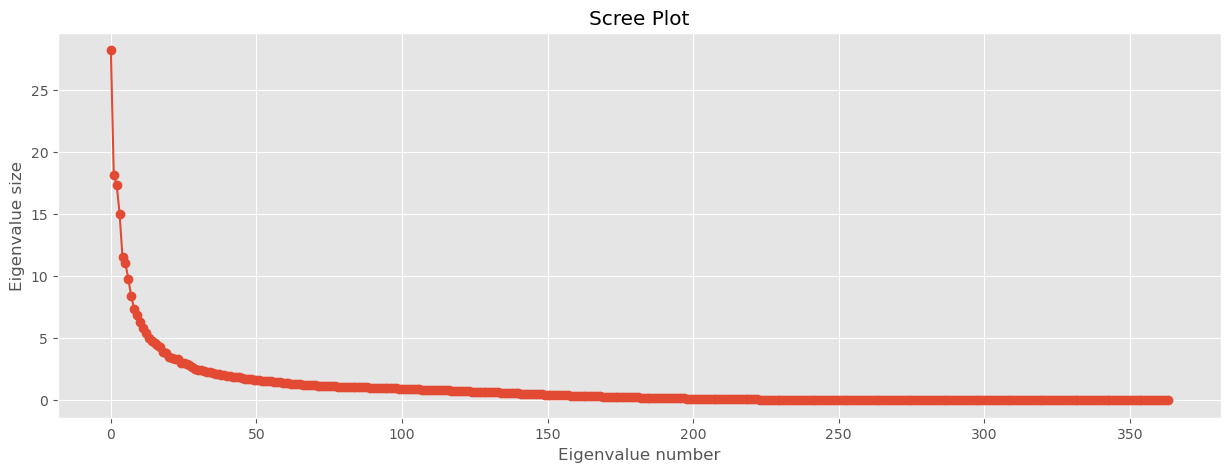

In [372]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(train)
x_test = pca.transform(test)
plt.figure(figsize=(15,5))
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

### From above CDF graph we can see that maximum variance can be explained using 25 principal components (the elbow point)

In [425]:
pca = PCA(n_components=25)
x_train = pca.fit_transform(train)
x_test = pca.transform(test)

In [426]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [427]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train,train_size=0.8)

In [428]:
regressor = xgb.XGBRegressor(n_estimators=20,reg_lambda=40,gamma=600,max_depth=200)
regressor.fit(X_train, Y_train)
pd.DataFrame(regressor.feature_importances_.reshape(1, -1))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.024092,0.226885,0.150361,0.02353,0.044362,0.049162,0.022303,0.019392,0.020226,0.027245,...,0.022843,0.027458,0.015151,0.027016,0.026646,0.023776,0.064146,0.027167,0.0385,0.021909


In [429]:
Y_pred = regressor.predict(X_test)
print("MSE: " + str(mean_squared_error(Y_test,Y_pred)) + " R2-Score: "+str(r2_score(Y_test,Y_pred)))

MSE: 87.12105784499767 R2-Score: 0.4800502881611578


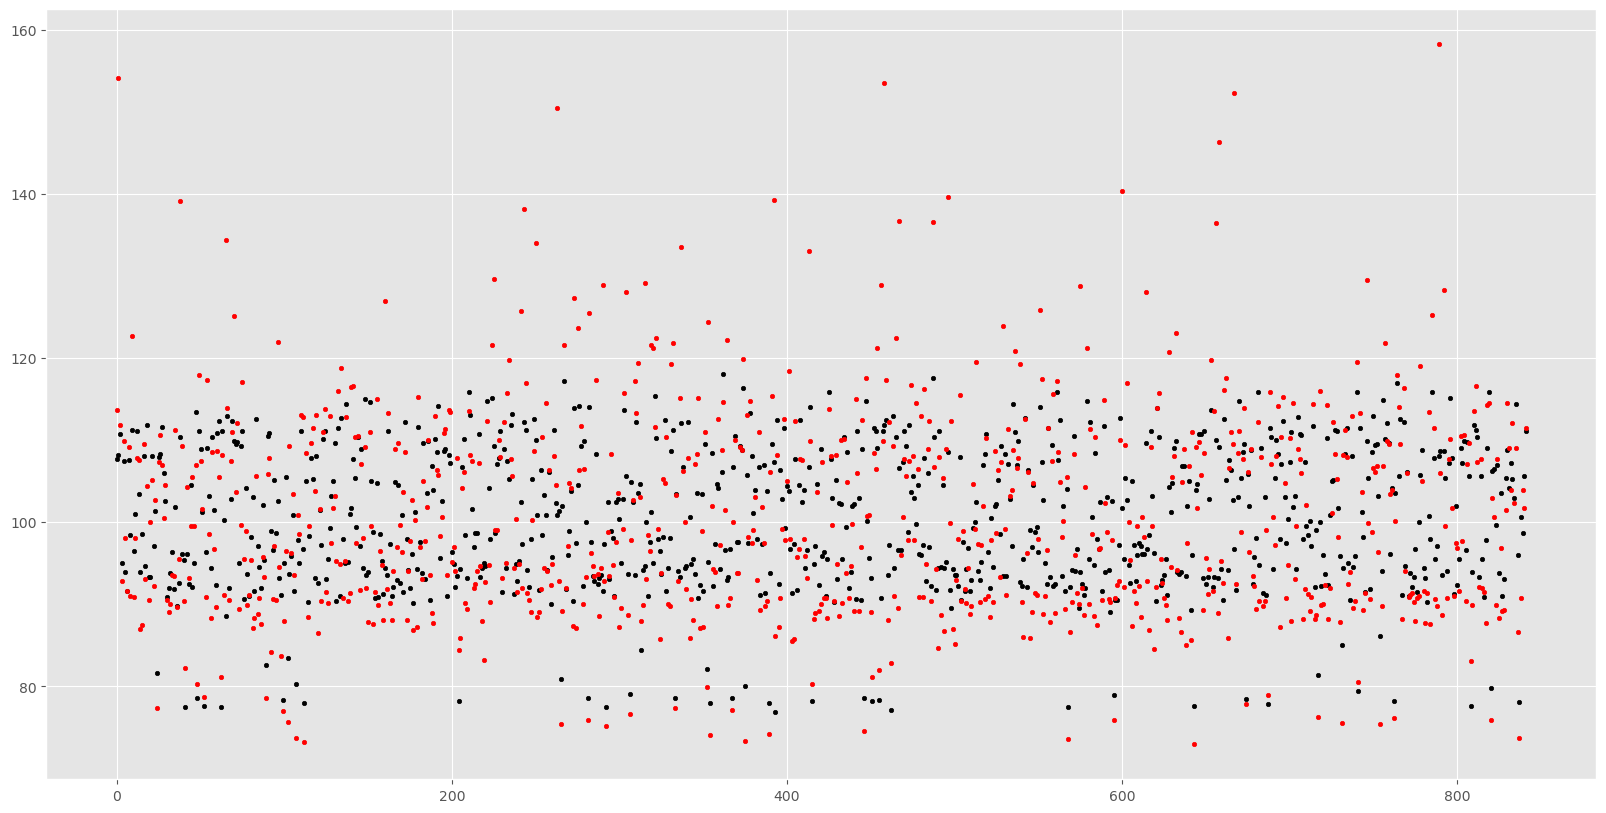

In [430]:
plt.figure(figsize=(20,10))
plt.scatter(range(0,len(Y_pred)),Y_pred,c='black',s=10)
plt.scatter(range(0,len(Y_test)),Y_test,c='red',s=10)

# Testing the actual test data provided

In [432]:
y_test = regressor.predict(x_test)

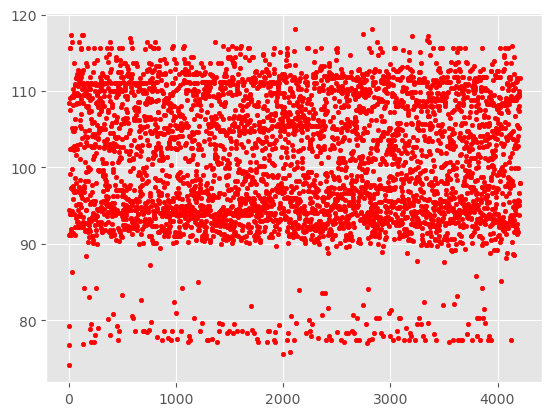

In [436]:
plt.scatter(range(0,len(y_test)),y_test,c='red',s=10)